In [3]:
import tensorflow as tf

from tensorflow.keras import datasets,layers,models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# load the data set
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train[:5] #it is a 2-D array we convert it into 1-D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test=y_test.reshape(-1,)

In [13]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

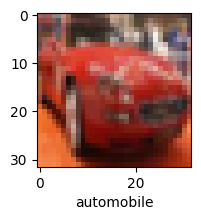

In [15]:
plot_sample(x_train,y_train,5)

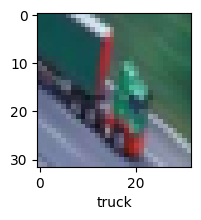

In [20]:
plot_sample(x_train,y_train,50)

In [21]:
# normalise the data
x_train=x_train/255.0
x_test=x_test/255.0

In [25]:
from keras import Sequential
from tensorflow import keras

In [28]:
#buildind simple ANN for image classification
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 109s 69ms/step - loss: 1.8134 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.6227 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5434 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4819 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4324 - accuracy: 0.4950


In [32]:
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification report:\n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 16ms/step
classification report:
               precision    recall  f1-score   support

           0       0.75      0.30      0.42      1000
           1       0.71      0.36      0.48      1000
           2       0.37      0.39      0.38      1000
           3       0.29      0.45      0.35      1000
           4       0.50      0.31      0.38      1000
           5       0.37      0.38      0.37      1000
           6       0.59      0.44      0.51      1000
           7       0.61      0.48      0.54      1000
           8       0.57      0.62      0.60      1000
           9       0.35      0.80      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



In [39]:
# create a graph
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

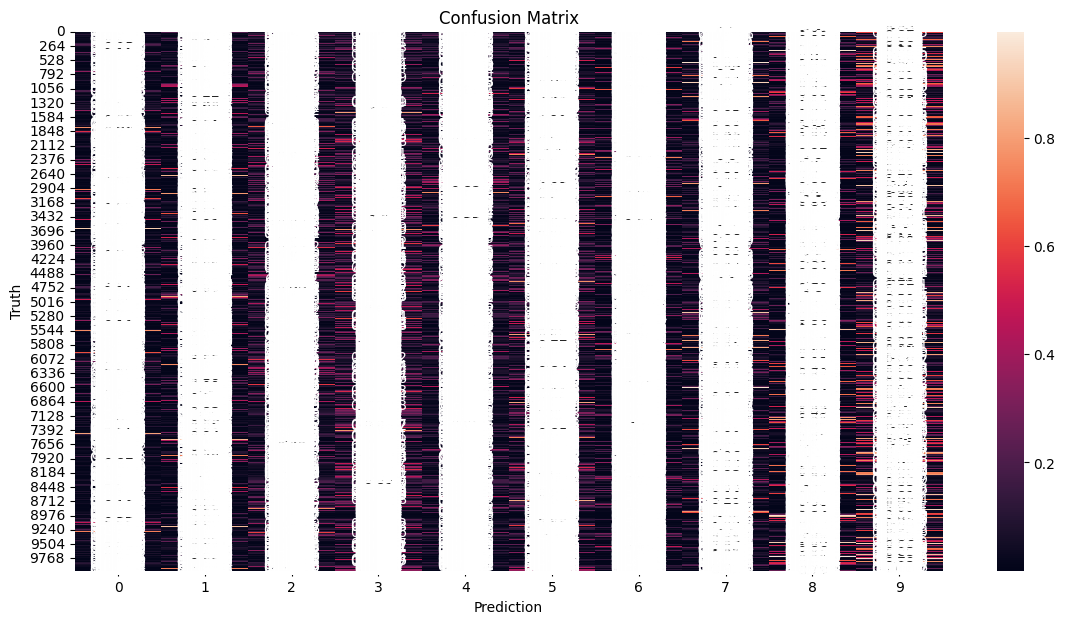

In [40]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred,annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show

In [43]:
# write CNN model to train the images
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [53]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 32ms/step - loss: 1.4744 - accuracy: 0.4724
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1445 - accuracy: 0.5994
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0144 - accuracy: 0.6461
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9250 - accuracy: 0.6802
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8578 - accuracy: 0.7011
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8030 - accuracy: 0.7218
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7577 - accuracy: 0.7369
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7073 - accuracy: 0.7551
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6740 - accuracy: 0.7656
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [55]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9486 - accuracy: 0.6907


[0.9486255049705505, 0.6906999945640564]

In [56]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[3.31715040e-04, 1.61363021e-03, 2.27762200e-03, 7.42821574e-01,
        2.87815183e-03, 9.28251594e-02, 6.51932927e-03, 1.27513049e-04,
        1.50151566e-01, 4.53729852e-04],
       [2.33248575e-04, 5.00398949e-02, 3.00945089e-07, 2.15998682e-07,
        1.93713703e-08, 2.76072534e-08, 3.92377997e-09, 1.67652087e-10,
        9.49553668e-01, 1.72647502e-04],
       [2.90611945e-02, 7.89235830e-02, 8.24968505e-04, 1.86510477e-03,
        6.48706977e-04, 9.42302213e-05, 1.15051873e-04, 8.97015852e-05,
        8.87396038e-01, 9.81460442e-04],
       [9.66637731e-01, 7.20343887e-05, 9.10412893e-03, 1.58117036e-04,
        8.89025046e-04, 4.25467562e-07, 2.45608885e-06, 1.95048506e-05,
        2.31136847e-02, 2.87660055e-06],
       [5.20544245e-06, 5.70134434e-05, 1.09653305e-02, 7.24561280e-03,
        2.92095747e-02, 3.07204347e-04, 9.52103198e-01, 2.01047151e-05,
        7.03532132e-05, 1.64664289e-05]], dtype=float32)

In [57]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [58]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

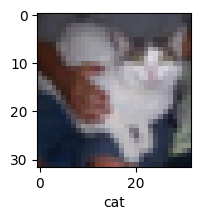

In [59]:
plot_sample(x_test,y_test,77)

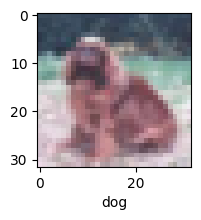

In [60]:
plot_sample(x_test,y_test,101)

In [61]:
# check wether predicting right classes or not
classes[y_classes[77]]

'cat'